# 6. Numerical Stability

In [1]:
import time
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchvision
from torch import nn
from torch.utils import data
from torchvision import transforms

## Numerical Stability

Consider a deep neural network with $L$ layers, input $x$ and output $o$. 

Each layer $l$ is defined by a transformation $f_l$ and parameterized by weights $\mathbf{W}^{(l)}$. The hidden variables are $\mathbf{h}^{(l)}$ where $\mathbf{h}^{(0)} = \mathbf{x}$.

This net can be expressed as:

$$\mathbf{o} = f_L \circ \ldots \circ f_1(\mathbf{x}) \text{ where }\mathbf{h}^{(l)} = f_l (\mathbf{h}^{(l-1)})$$

Then, the gradient of the output $o$ in respect to the parameter $\mathbf{W}^{(l)}$ is given as:

$$\partial_{\mathbf{W}^{(l)}} \mathbf{o} = \underbrace{\partial_{\mathbf{h}^{(L-1)}} \mathbf{h}^{(L)}}_{ \mathbf{M}^{(L)} \stackrel{\mathrm{def}}{=}} \cdot \ldots \cdot \underbrace{\partial_{\mathbf{h}^{(l)}} \mathbf{h}^{(l+1)}}_{ \mathbf{M}^{(l+1)} \stackrel{\mathrm{def}}{=}} \underbrace{\partial_{\mathbf{W}^{(l)}} \mathbf{h}^{(l)}}_{ \mathbf{v}^{(l)} \stackrel{\mathrm{def}}{=}}$$

which is equivalent to the product of $L-l$ matrices $\mathbf{M}^{(L)} \cdot \ldots \cdot \mathbf{M}^{(l+1)}$ with the gradient vector $\mathbf{v}^{(l)}$.

This multiplication left us with 2 possible situations:

1. **`Gradient Exploding`**: excessively **large** parameters that prevents the model from converging to stability
2. **`Gradient Vanishing`**: exccessively **small** parameters that makes learning impossible (parameters hardly move on each update)

## Gradient Vanishing

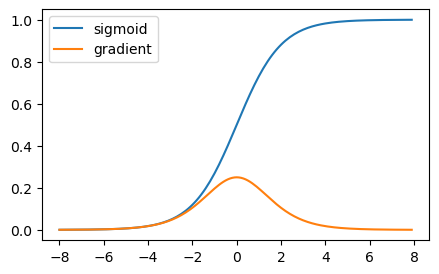

In [7]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

plt.figure(figsize=(5,3))
plt.plot(x.detach(), y.detach())
plt.plot(x.detach(), x.grad.numpy())
plt.legend(['sigmoid', 'gradient'])
plt.show()

As you can see, the gradient of the **sigmoid** function vanishes when the input is very small or very large.

## Gradient Exploding

In [9]:
M = torch.normal(0, 1, size=(4,4))
for i in range(100):
    M = torch.mm(M, torch.normal(0, 1, size=(4,4)))
M

tensor([[ 2.0882e+26, -4.6634e+26, -2.7460e+25, -7.5288e+25],
        [ 9.3439e+25, -2.0867e+26, -1.2287e+25, -3.3688e+25],
        [-5.8254e+25,  1.3009e+26,  7.6602e+24,  2.1002e+25],
        [-1.0363e+26,  2.3143e+26,  1.3627e+25,  3.7362e+25]])

As shown above, the **initialization** of parameters sometimes leads to gradient exploding, which prevents the optimization algorithm from converging.

## Symmetry

When we initialize the parameters with the **same values**, back propagation will update them with the **same step and direction**. Therefore, the parameters will always be the same instead of converging towards the optimal values.

We can prevent this by using **dropout regularization**.

## Parameter Initialization

The **`Xavier initialization`** is given as:

$$U\left(-\sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}, \sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}\right)$$

where $n_\mathrm{in}$ and $n_\mathrm{out}$ are the numbers of inputs and outputs.

This initialization satisfies the following:

$$
\begin{aligned}
\frac{1}{2} (n_\mathrm{in} + n_\mathrm{out}) \sigma^2 = 1 \text{ or }
\sigma = \sqrt{\frac{2}{n_\mathrm{in} + n_\mathrm{out}}}
\end{aligned}
$$